<a href="https://colab.research.google.com/github/AnniKanojia/Hatespeech-Detection/blob/main/HateDpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
import pandas as pd
import numpy as np

In [357]:
dataset = pd.read_csv("labeled_data.csv")

In [358]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [359]:
dataset.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [360]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [361]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [362]:
dataset["labels"] = dataset["class"].map({0:"Hate Speech",
                                       1:"Offensive Language",
                                       2:"No hate nor offensive language"})

In [363]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate nor offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate nor offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [364]:
data = dataset[["tweet","labels"]]

In [365]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate nor offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No hate nor offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [366]:
import re
import nltk
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [367]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [368]:
from nltk.stem import SnowballStemmer
stemmer = nltk.SnowballStemmer("english")

In [369]:
#data cleaning
def clean_data(text):
  text = str(text).lower()
  text = re.sub('https?://\s+|www\.S+','',text)
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]' %re.escape(string.punctuation),'',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  #stopwords removal
  text = [word for word in text.split(' ') if word not in stopwords]
  text = " ".join(text)
  #stemmer the text
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text

In [370]:
data["tweet"] = data["tweet"].apply(clean_data)

<ipython-input-370-44932d4fb622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [371]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate nor offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No hate nor offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [372]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [373]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [374]:
y

array(['No hate nor offensive language', 'Offensive Language',
       'Offensive Language', ..., 'Offensive Language',
       'Offensive Language', 'No hate nor offensive language'],
      dtype=object)

In [375]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [376]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [377]:
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 198287 stored elements and shape (24783, 26151)>

In [378]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [379]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 132893 stored elements and shape (16604, 26151)>

In [380]:
#Building our ML Model
from sklearn.tree import DecisionTreeClassifier

In [381]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [382]:
y_pred = dt.predict(X_test)

In [383]:
#Confusion Matrix and accuracy
from sklearn.metrics import confusion_matrix

In [384]:
cn = confusion_matrix(y_test, y_pred)
cn

array([[ 149,   36,  280],
       [  33, 1092,  254],
       [ 228,  206, 5901]])

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

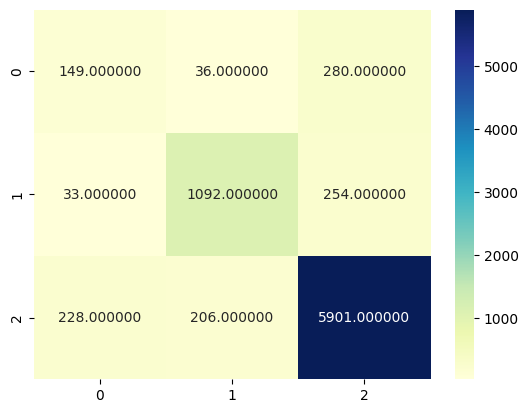

In [386]:
sns.heatmap(cn, annot = True, fmt = "f", cmap="YlGnBu")

In [387]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.87321188409341

In [388]:
sample  = "Lets unite and Kill all the people who are protesting against the government"
sample = clean_data(sample)
sample

'let unit kill peopl protest govern'

In [389]:
data1 = cv.transform([sample]).toarray()
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [390]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)